In [19]:
#Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [20]:
#Import dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [22]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [23]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [24]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [25]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

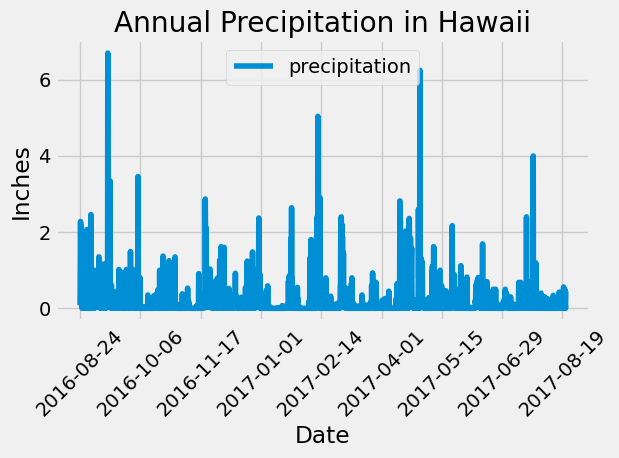

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')
first_date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_query, columns=['date', 'precipitation'])

# Clean up data to remove non value entries
prcp_df = prcp_df.dropna(how='any') 

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date')
prcp_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
fig1 = prcp_df.plot(rot=45, xlabel="Date", ylabel="Inches", title = "Annual Precipitation in Hawaii")
plt.tight_layout()
plt.show()
fig1.figure.savefig('Precipitation_Hawaii.png', bbox_inches='tight')

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
temps

(54.0, 85.0, 71.66378066378067)

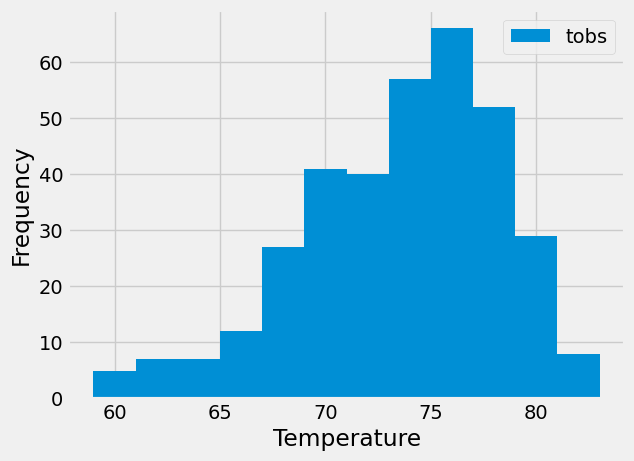

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_data = session.query(Measurement.date, Measurement.tobs).\
        filter(func.strftime(Measurement.date) >= first_date, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
station_df = pd.DataFrame(temps_data, columns=['Measurement Date', 'Temperature'])

plt.hist(station_df['Temperature'], bins=12, label="tobs", density=False)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Temperatures_station_USC00519281.png', bbox_inches='tight')

# Close Session

In [16]:
# Close Session
session.close()
